In [27]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error
import pickle

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
data_dir = '/content/drive/MyDrive/Machine/data'
os.listdir(data_dir)

['sample_submission.csv', 'train.csv', 'test.csv']

In [4]:
train_dir = data_dir + '/train.csv'
train_df = pd.read_csv(train_dir)
train_df.sample(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
294378,id2670984,2,2016-06-11 15:34:03,2016-06-11 15:46:05,2,-73.980408,40.754723,-73.984947,40.732319,N,722
276449,id1684550,1,2016-02-22 16:56:57,2016-02-22 17:11:08,2,-73.963104,40.772858,-73.992142,40.759109,N,851
828980,id1221635,2,2016-04-28 13:32:37,2016-04-28 13:41:29,1,-73.974091,40.751492,-73.969170,40.760380,N,532
1344312,id3946674,2,2016-05-21 09:37:15,2016-05-21 09:47:27,1,-74.016953,40.706131,-74.009178,40.713161,N,612
1372187,id2592795,1,2016-06-15 23:19:59,2016-06-15 23:34:50,1,-73.979645,40.760391,-73.984459,40.732914,N,891
155504,id1942962,2,2016-05-13 18:50:03,2016-05-13 19:06:18,6,-73.968224,40.762379,-73.982712,40.751141,N,975
94394,id3252852,1,2016-03-20 10:52:41,2016-03-20 11:11:17,1,-73.978462,40.751968,-74.016052,40.708725,N,1116
1155551,id3169834,2,2016-05-10 17:50:12,2016-05-10 18:13:22,1,-73.999519,40.713890,-73.987518,40.750130,N,1390
1174812,id3499850,2,2016-03-26 19:17:24,2016-03-26 19:34:08,1,-73.991577,40.751305,-73.990479,40.756432,N,1004
1315463,id0692436,2,2016-06-14 07:54:28,2016-06-14 08:41:27,1,-73.863297,40.769890,-74.004303,40.707329,N,2819


In [5]:
test_dir = data_dir + '/test.csv'
test_df = pd.read_csv(test_dir)
test_df.sample(10)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
281437,id3026371,1,2016-04-10 02:00:11,4,-73.987167,40.733410,-73.981491,40.741329,N
576670,id2757145,2,2016-01-16 00:19:38,1,-73.998352,40.745312,-74.002930,40.728241,N
420840,id1711910,1,2016-03-02 09:54:03,1,-73.986435,40.740162,-74.011253,40.703030,N
561845,id1864330,2,2016-01-20 13:12:38,1,-73.959038,40.765610,-73.970490,40.757889,N
621771,id2962071,1,2016-01-02 01:54:44,1,-74.000763,40.730663,-73.971786,40.750694,N
314132,id2478581,2,2016-04-01 12:00:44,1,-73.964088,40.767830,-73.949829,40.776058,N
52530,id3245764,2,2016-06-15 07:32:22,6,-73.981949,40.773281,-74.004097,40.729870,N
155514,id0065936,2,2016-05-15 13:54:28,2,-73.946739,40.784798,-73.969101,40.800777,N
113025,id2485426,2,2016-05-27 15:55:33,1,-73.994919,40.739811,-73.979843,40.714359,N
318113,id0257170,2,2016-03-31 09:52:08,1,-73.987221,40.724491,-73.983398,40.734131,N


In [6]:
train_df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [7]:
# remove outliers
train_mean = np.mean(train_df['trip_duration'])
train_std = np.std(train_df['trip_duration'])
train_df = train_df[(train_mean - 5 * train_std <= train_df.trip_duration) & (train_df.trip_duration <= train_mean + 5 * train_std)]
train_df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.456603e+06,1.456603e+06,1.456603e+06,1.456603e+06,1.456603e+06,1.456603e+06,1.456603e+06
mean,1.534303e+00,1.663950e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,8.376007e+02
std,4.988221e-01,1.313619e+00,7.093200e-02,3.288342e-02,7.067477e-02,3.588855e-02,6.694573e+02
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073589e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075453e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396302e+01,4.076981e+01,1.073000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,2.706400e+04


In [8]:
# Convert dates to pd format so we can easily manipulate them
train_df.pickup_datetime = pd.to_datetime(train_df.pickup_datetime)
train_df.loc[:, 'pickup_date'] = train_df.pickup_datetime.dt.date

train_df.dropoff_datetime = pd.to_datetime(train_df.dropoff_datetime)

test_df.pickup_datetime = pd.to_datetime(test_df.pickup_datetime)
test_df.loc[:, 'pickup_date'] = test_df.pickup_datetime.dt.date


In [9]:
# Split the date to Month, Day, Week, and Hour
def split_date(df):
    df['day'] = df['pickup_datetime'].dt.day
    df['hour'] = df['pickup_datetime'].dt.hour
    df['month'] = df['pickup_datetime'].dt.month
    df['week'] = df['pickup_datetime'].dt.dayofweek
    return df

train_df = split_date(train_df)
test_df = split_date(test_df)

train_df.sample(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,day,hour,month,week
911303,id0470852,1,2016-01-16 01:28:35,2016-01-16 01:36:50,2,-74.004356,40.713501,-74.009094,40.732773,N,495,2016-01-16,16,1,1,5
870322,id2537119,2,2016-02-28 01:01:01,2016-02-28 01:11:46,1,-73.978661,40.744869,-73.997627,40.721706,N,645,2016-02-28,28,1,2,6
452492,id2532967,2,2016-06-09 12:45:30,2016-06-09 13:15:55,1,-73.960098,40.769512,-73.989021,40.751350,N,1825,2016-06-09,9,12,6,3
190899,id2207344,2,2016-02-23 09:35:34,2016-02-23 09:48:57,1,-74.002998,40.749603,-74.002693,40.760609,N,803,2016-02-23,23,9,2,1
77481,id0467623,1,2016-03-01 00:27:44,2016-03-01 00:31:16,2,-74.001961,40.724522,-73.993660,40.721184,N,212,2016-03-01,1,0,3,1
318255,id0248267,1,2016-01-31 20:22:21,2016-01-31 20:34:04,1,-73.978325,40.783173,-74.000191,40.743557,N,703,2016-01-31,31,20,1,6
1177335,id1163788,2,2016-02-12 19:54:14,2016-02-12 20:02:27,1,-73.972702,40.755440,-73.978928,40.766800,N,493,2016-02-12,12,19,2,4
1334535,id1202396,2,2016-05-02 10:58:27,2016-05-02 11:18:30,1,-73.999367,40.739342,-73.989326,40.752861,N,1203,2016-05-02,2,10,5,0
620105,id3621662,1,2016-04-10 14:56:30,2016-04-10 15:04:23,1,-73.991554,40.717464,-73.978691,40.735310,N,473,2016-04-10,10,14,4,6
497810,id1020489,1,2016-03-17 09:26:54,2016-03-17 09:47:40,1,-73.986305,40.751850,-73.966576,40.761154,N,1246,2016-03-17,17,9,3,3


In [10]:
matplotlib.rcParams['figure.figsize'] = (10,6)

def show_hist(col_name):
    plt.hist(train_df[col_name].values, bins=50)
    plt.xlabel(col_name)
    plt.ylabel('count')
    plt.show()

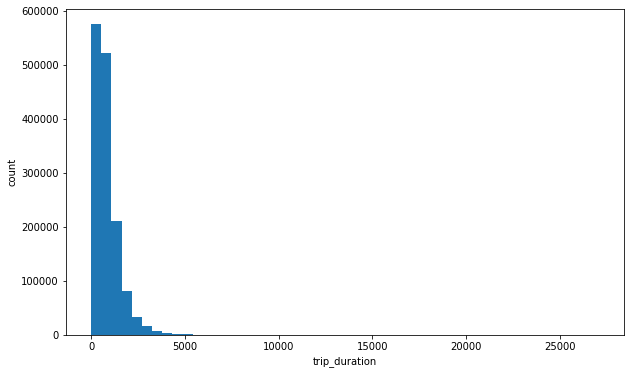

In [11]:
show_hist('trip_duration')

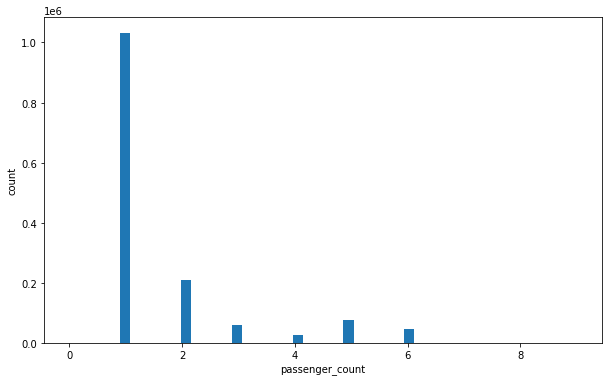

In [12]:
show_hist('passenger_count')

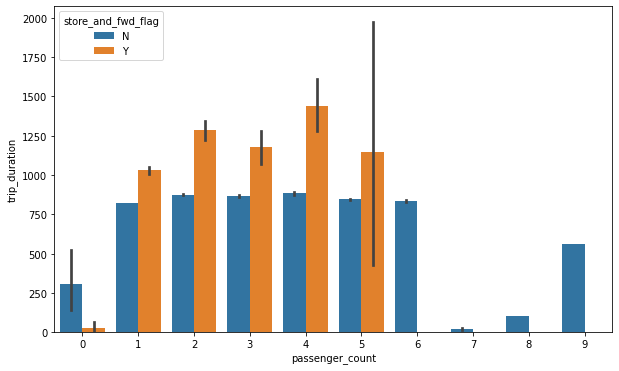

In [13]:
sns.barplot(x='passenger_count', y='trip_duration', hue='store_and_fwd_flag', data = train_df)

In [14]:
R = 6371

# The haversine distance which is the great-circle distance between two points on a sphere given their longitudes and latitudes
def haversine_distance(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * R * np.arcsin(np.sqrt(d))
    return h

def manhattan_distance(lat1, lng1, lat2, lng2):
    a = haversine_distance(lat1, lng1, lat1, lng2)
    b = haversine_distance(lat1, lng1, lat2, lng1)
    return a + b

def direction(lat1, lng1, lat2, lng2):
    lng_delta_rad = np.radians(lng2 - lng1)
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    return np.degrees(np.arctan2(y, x))

In [15]:
train_df.loc[:, 'haversine_distance'] = haversine_distance(train_df.pickup_latitude.values, train_df.pickup_longitude.values, train_df.dropoff_latitude.values, train_df.dropoff_longitude.values)
train_df.loc[:, 'manhattan_distance'] = manhattan_distance(train_df.pickup_latitude.values, train_df.pickup_longitude.values, train_df.dropoff_latitude.values, train_df.dropoff_longitude.values)
train_df.loc[:, 'direction'] = direction(train_df.pickup_latitude.values, train_df.pickup_longitude.values, train_df.dropoff_latitude.values, train_df.dropoff_longitude.values)

test_df.loc[:, 'haversine_distance'] = haversine_distance(test_df.pickup_latitude.values, test_df.pickup_longitude.values, test_df.dropoff_latitude.values, test_df.dropoff_longitude.values)
test_df.loc[:, 'manhattan_distance'] = manhattan_distance(test_df.pickup_latitude.values, test_df.pickup_longitude.values, test_df.dropoff_latitude.values, test_df.dropoff_longitude.values)
test_df.loc[:, 'direction'] = direction(test_df.pickup_latitude.values, test_df.pickup_longitude.values, test_df.dropoff_latitude.values, test_df.dropoff_longitude.values)

In [16]:
train_df.sample(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,day,hour,month,week,haversine_distance,manhattan_distance,direction
560332,id1166789,1,2016-02-16 15:11:56,2016-02-16 15:53:10,1,-73.974678,40.755867,-73.875648,40.770363,N,2474,2016-02-16,16,15,2,1,8.494671,9.953118,79.029471
412843,id3498917,2,2016-01-20 22:35:51,2016-01-20 22:39:34,2,-73.971199,40.754951,-73.962601,40.764698,N,223,2016-01-20,20,22,1,2,1.303460,1.808014,33.748786
659463,id2330046,2,2016-04-24 01:56:34,2016-04-24 02:07:54,1,-73.976433,40.750599,-74.006790,40.706600,N,680,2016-04-24,24,1,4,6,5.520826,7.449636,-152.386925
122037,id1058651,1,2016-03-16 21:19:59,2016-03-16 21:38:38,1,-73.982063,40.772190,-73.955070,40.741478,N,1119,2016-03-16,16,21,3,2,4.102629,5.688076,146.337370
278426,id2338047,1,2016-06-26 05:27:45,2016-06-26 05:34:51,1,-73.995514,40.764912,-73.992767,40.740295,N,426,2016-06-26,26,5,6,6,2.746961,2.968514,175.167789
491710,id0890677,1,2016-05-12 21:17:27,2016-05-12 21:35:29,2,-73.989304,40.736374,-73.991173,40.718002,N,1082,2016-05-12,12,21,5,3,2.048890,2.200316,-175.590365
953128,id2866889,2,2016-04-11 12:58:20,2016-04-11 13:02:40,1,-74.015984,40.711349,-74.008347,40.703934,N,260,2016-04-11,11,12,4,0,1.046112,1.468293,142.019633
176906,id3336190,2,2016-06-04 03:51:06,2016-06-04 04:14:03,1,-73.991096,40.745090,-73.909782,40.775311,N,1377,2016-06-04,4,3,6,5,7.628598,10.210506,63.838369
200136,id3531391,2,2016-04-21 02:24:29,2016-04-21 02:45:58,1,-73.995621,40.759548,-73.954720,40.727188,N,1289,2016-04-21,21,2,4,3,4.982048,7.043190,136.227080
1406143,id2783132,2,2016-05-23 10:18:37,2016-05-23 10:28:34,3,-73.975952,40.786495,-73.963242,40.810673,N,597,2016-05-23,23,10,5,0,2.893500,3.758538,21.697134


In [17]:
numerical_cols = ['haversine_distance', 'manhattan_distance', 'direction' ]
categorical_cols = ['vendor_id', 'passenger_count', 'store_and_fwd_flag', 'day', 'hour', 'month', 'week' ]

# Normalize the numerical columns to make sure they use the same scale
scaler = MinMaxScaler().fit(train_df[numerical_cols])
train_df[numerical_cols] = scaler.transform(train_df[numerical_cols])
test_df[numerical_cols] = scaler.transform(test_df[numerical_cols])

# Convert categorical data into dummy or indicator variables.
# We have few categorical columns and few classes for each column
# So, we can use the OneHotEncoder
def encode_categorical(df):
    for categorical in categorical_cols:
        encoded_cat = pd.get_dummies(df[categorical], prefix=categorical, prefix_sep='_')
        df = (df.drop([categorical], axis=1)).join(encoded_cat)
    return df
train_df = encode_categorical(train_df)
test_df = encode_categorical(test_df)

In [18]:
train_df.sample(10)

,id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_date,haversine_distance,...,month_4,month_5,month_6,week_0,week_1,week_2,week_3,week_4,week_5,week_6
134129,id0038295,2016-02-01 20:56:50,2016-02-01 21:27:36,-73.959053,40.767349,-74.014816,40.717030,1846,2016-02-01,0.005888,...,0,0,0,1,0,0,0,0,0,0
1041145,id2656354,2016-04-28 13:15:26,2016-04-28 13:21:04,-73.976616,40.756443,-73.966049,40.762379,338,2016-04-28,0.000893,...,1,0,0,0,0,0,1,0,0,0
710764,id0603025,2016-01-31 23:16:27,2016-01-31 23:26:03,-73.976768,40.764908,-73.994911,40.738155,576,2016-01-31,0.002695,...,0,0,0,0,0,0,0,0,0,1
316689,id1358378,2016-03-16 10:35:35,2016-03-16 10:42:48,-73.979256,40.747097,-73.989334,40.730373,433,2016-03-16,0.001647,...,0,0,0,0,0,1,0,0,0,0
83859,id1988181,2016-05-02 12:40:57,2016-05-02 12:49:57,-73.972794,40.759068,-73.977081,40.743294,540,2016-05-02,0.001443,...,0,1,0,1,0,0,0,0,0,0
222282,id3521040,2016-05-05 06:56:00,2016-05-05 06:59:50,-73.958534,40.778423,-73.963516,40.770050,230,2016-05-05,0.000823,...,0,1,0,0,0,0,1,0,0,0
1117964,id2037626,2016-05-31 10:01:13,2016-05-31 10:02:06,-74.001968,40.734947,-74.000328,40.732601,53,2016-05-31,0.000238,...,0,1,0,0,1,0,0,0,0,0
254610,id3069747,2016-01-16 02:17:18,2016-01-16 02:36:42,-73.981644,40.740849,-73.947952,40.715351,1164,2016-01-16,0.003233,...,0,0,0,0,0,0,0,0,1,0
1360835,id3151289,2016-04-24 21:00:07,2016-04-24 21:06:21,-73.959694,40.766907,-73.975975,40.744774,374,2016-04-24,0.002270,...,1,0,0,0,0,0,0,0,0,1
1120233,id3752953,2016-03-31 15:45:12,2016-03-31 15:50:43,-74.001678,40.741173,-73.989708,40.744137,331,2016-03-31,0.000855,...,0,0,0,0,0,0,1,0,0,0


In [19]:
train_drop_cols = ['id', 'pickup_datetime', 'dropoff_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'pickup_date']
train_df = train_df.drop(train_drop_cols, axis = 1)
train_df.sample(10)

,trip_duration,haversine_distance,manhattan_distance,direction,vendor_id_1,vendor_id_2,passenger_count_0,passenger_count_1,passenger_count_2,passenger_count_3,...,month_4,month_5,month_6,week_0,week_1,week_2,week_3,week_4,week_5,week_6
743637,632,0.002199,0.002375,0.025663,0,1,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
908740,264,0.001806,0.002311,0.080497,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
569486,776,0.001738,0.002111,0.307959,1,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
683255,264,0.002334,0.003039,0.591611,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
1002190,251,0.001335,0.001438,0.525028,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
869615,1997,0.003407,0.004312,0.574909,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
606211,1191,0.004572,0.006044,0.106536,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
671391,256,0.000661,0.000626,0.748916,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
300155,471,0.000958,0.001048,0.721306,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
188628,779,0.001875,0.001816,0.745210,1,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [20]:
test_drop_cols = ['id', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'pickup_date']
test_df = test_df.drop(test_drop_cols, axis = 1)

In [21]:
test_df.sample(10)

,haversine_distance,manhattan_distance,direction,vendor_id_1,vendor_id_2,passenger_count_0,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,...,month_4,month_5,month_6,week_0,week_1,week_2,week_3,week_4,week_5,week_6
73520,0.001167,0.001510,0.412319,1,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
436166,0.002020,0.002506,0.565871,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
238213,0.002377,0.002309,0.505192,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
133080,0.000385,0.000509,0.358308,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
231858,0.000632,0.000699,0.718862,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
503409,0.004319,0.005333,0.064135,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6752,0.004106,0.005231,0.078308,0,1,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
413260,0.001267,0.001381,0.722182,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
243863,0.004319,0.005658,0.096844,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
539973,0.001395,0.001376,0.742093,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [22]:
# The test_df has 83 columns while train_df has 86 columns 
missed_cols = list(set(train_df.columns) - set(test_df.columns))
missed_cols

['passenger_count_7', 'passenger_count_8', 'trip_duration']

In [23]:
test_df['passenger_count_7'] = 0
test_df['passenger_count_8'] = 0
test_df = test_df[list(train_df.columns.values)[1:]]
test_df.sample(10)

,haversine_distance,manhattan_distance,direction,vendor_id_1,vendor_id_2,passenger_count_0,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,...,month_4,month_5,month_6,week_0,week_1,week_2,week_3,week_4,week_5,week_6
532413,0.001164,0.001115,0.252851,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
140718,0.001273,0.001627,0.329847,1,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
388999,0.001545,0.001842,0.948340,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
198130,0.002736,0.002744,0.510846,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
10338,0.000602,0.000688,0.539111,1,0,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,0
169461,0.001335,0.001767,0.358125,1,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
279373,0.000672,0.000895,0.128705,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
512171,0.003134,0.004157,0.638032,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
309504,0.001573,0.001779,0.036686,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
241316,0.000981,0.001235,0.927950,1,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [24]:
train_df.to_csv('/content/drive/MyDrive/Machine/data/train_processed.csv', index=False)
test_df.to_csv('/content/drive/MyDrive/Machine/data/test_processed.csv', index=False)

In [31]:
def run_expirement(size):
  train_data, val_data = train_test_split(train_df[0:size], test_size=0.2, random_state=42)
  
  train_X = train_data.drop(['trip_duration'], axis=1)
  train_y = train_data["trip_duration"]
  val_X = val_data.drop(['trip_duration'], axis=1)
  val_y = val_data["trip_duration"]

  print(train_X.shape, train_y.shape)

  print("Training...")
  model = RandomForestRegressor(n_jobs = -1, random_state = 42, n_estimators = 200, max_depth = 20)
  model.fit(train_X, train_y)
  print("Training Done...")

  score = model.score(val_X, val_y), model.score(train_X, train_y)
  print("Score: ", score)

  train_preds = model.predict(train_X)
  train_rmsle = mean_squared_log_error(train_y, train_preds, squared=False)
  print(str(size) + " Training RMSLE: ", train_rmsle)

  val_preds = model.predict(val_X)
  val_rmsle = mean_squared_log_error(val_y, val_preds, squared=False)
  print(str(size) + " Validation RMSLE: ", val_rmsle)
  
  pickle.dump(model, open('/content/drive/MyDrive/Machine/models/random_forest_'+str(size)+'.sav', 'wb'))
  print("Models Saved...")

In [29]:
run_expirement(100000)

(80000, 85) (80000,)
Training...
Training Done...
Score:  (0.7000734463784656, 0.9598084384250036)
100000 Training RMSLE:  0.2160115099793296
100000 Validation RMSLE:  0.44511645080050877
Models Saved...


In [30]:
run_expirement(500000)

(400000, 85) (400000,)
Training...
Training Done...
Score:  (0.7051917032801045, 0.9609158039393126)
500000 Training RMSLE:  0.20713986419517405
500000 Validation RMSLE:  0.43290012375452425
Models Saved...


In [32]:
run_expirement(1000000)

(800000, 85) (800000,)
Training...
Training Done...
Score:  (0.7116911288196218, 0.8100142042021032)
1000000 Training RMSLE:  0.39732052229780607
1000000 Validation RMSLE:  0.43731820207927347
Models Saved...


In [ ]:
run_expirement(train_df.shape[0])

(1165282, 85) (1165282,)
Training...


In [34]:
def save_submission(size):
  submission_df = pd.read_csv(data_dir + '/sample_submission.csv')
  model = pickle.load(open('/content/drive/MyDrive/Machine/models/random_forest_'+str(size)+'.sav', 'rb'))
  test_preds = model.predict(test_df)
  submission_df['trip_duration'] = test_preds
  submission_df.to_csv('/content/drive/MyDrive/Machine/data/submission_'+str(size)+'.csv', index=None)
  submission_df.sample(10)

In [35]:
save_submission(1000000)

In [36]:
save_submission(500000)

In [37]:
save_submission(100000)

In [ ]:
save_submission(train_df.shape[0])